In [1]:
# make the final full dataframe 2867154 rows x 68 columns 2015~2018
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pitches = pd.read_csv("pitches.csv")
games = pd.read_csv("games.csv")
player_name = pd.read_csv("player_names.csv")
atbats = pd.read_csv("atbats.csv")
pitches["ab_id"] = pitches["ab_id"].astype(int)
player_name.rename(columns={"id": "batter_id" }, inplace=True)
new_df = pd.merge(pitches, atbats,  how='left', left_on='ab_id', right_on = 'ab_id')
new_df1 = pd.merge(new_df, games, how='left', left_on='g_id', right_on="g_id")
new_df2 = pd.merge(new_df1, player_name, how='left', left_on='batter_id', right_on="batter_id")
new_df2["Batters Name"] = new_df2[["first_name", 'last_name']].apply(lambda x: ' '.join(x), axis=1)
new_df2.drop(['first_name', 'last_name'], axis=1, inplace=True)
player_name.rename(columns={'batter_id': 'pitcher_id'}, inplace=True)

# get final dataframe
final_df = pd.merge(new_df2, player_name, how='left', left_on='pitcher_id', right_on='pitcher_id')

# rename some columns
final_df['Pitcher_name'] = final_df[['first_name', 'last_name']].apply(lambda x: " ".join(x), axis=1)
final_df.drop(['first_name', 'last_name'], axis=1, inplace=True)
final_df['pitch_type'] = final_df['pitch_type'].map({'FF': 'Four Seam Fastball', 'SL': 'Slider', 'FT': 'Two seam fastball', 'CH': 'Changeup', 'SI': 'Sinker', 'CU': 'Curveball', 'FC': 'Cutter', 'KC': 'Knuckle Curve', 'FS': 'Splitter','KN': 'Knuckleball', 'EP': 'Eephus', 'FO': 'Pitch Out', 'PO': 'Pitch Out', 'SC': 'Screwball', 'UN': 'Unidentified', 'FA': 'Fastball', 'IN': 'Intentional Ball'})
final_df['code'] = final_df['code'].map({'B': 'Ball', '*B': 'Ball in dirt', 'S': 'Swinging Strike', 'C': 'Called Strike', 'F': 'Foul', 'T': 'Foul Tip', 'L': 'Foul Bunt', 'I': 'Intentional Ball', 'W': 'Blocked','M': 'Missed Bunt', 'P': 'Pitch Out', 'Q': 'Swinging Pitch Out', 'R': 'Foul Pitch Out', 'X': 'In play out(s)', 'D': 'In play no out', 'E': 'In play runs'})
final_df = final_df[sorted(final_df.columns)]


In [2]:
final_df.columns

Index(['Batters Name', 'Pitcher_name', 'ab_id', 'attendance',
       'away_final_score', 'away_team', 'ax', 'ay', 'az', 'b_count', 'b_score',
       'batter_id', 'break_angle', 'break_length', 'break_y', 'code', 'date',
       'delay', 'elapsed_time', 'end_speed', 'event', 'event_num', 'g_id',
       'home_final_score', 'home_team', 'inning', 'nasty', 'o', 'on_1b',
       'on_2b', 'on_3b', 'outs', 'p_score', 'p_throws', 'pfx_x', 'pfx_z',
       'pitch_num', 'pitch_type', 'pitcher_id', 'px', 'pz', 's_count',
       'spin_dir', 'spin_rate', 'stand', 'start_speed', 'start_time', 'sz_bot',
       'sz_top', 'top', 'type', 'type_confidence', 'umpire_1B', 'umpire_2B',
       'umpire_3B', 'umpire_HP', 'venue_name', 'vx0', 'vy0', 'vz0', 'weather',
       'wind', 'x', 'x0', 'y', 'y0', 'z0', 'zone'],
      dtype='object')

In [24]:
final_df.loc[final_df['code'].str.contains('In play')==True]['event']

5                 Groundout
7                    Double
10                   Single
20                   Double
24                Groundout
33                Groundout
47                   Single
54                   Single
58                   Double
67                   Flyout
71                   Double
78                Groundout
85                Groundout
92                   Single
98                   Flyout
121                Forceout
129               Groundout
130               Groundout
132               Groundout
138               Groundout
144                  Single
150                  Single
151                  Single
153                 Pop Out
170                  Double
172                 Lineout
178                  Flyout
186                  Flyout
189                 Pop Out
196               Groundout
                 ...       
2866992              Flyout
2866998              Single
2866999            Sac Bunt
2867000              Flyout
2867002            H

In [9]:
final_df[['code','event','o', 'on_1b',
       'on_2b', 'on_3b', 'outs', 'p_score', 'p_throws']]

,code,event,o,on_1b,on_2b,on_3b,outs,p_score,p_throws
0,Called Strike,Groundout,1,0.0,0.0,0.0,0.0,0,L
1,Swinging Strike,Groundout,1,0.0,0.0,0.0,0.0,0,L
2,Foul,Groundout,1,0.0,0.0,0.0,0.0,0,L
3,Ball,Groundout,1,0.0,0.0,0.0,0.0,0,L
4,Ball,Groundout,1,0.0,0.0,0.0,0.0,0,L
5,In play out(s),Groundout,1,0.0,0.0,0.0,0.0,0,L
6,Ball,Double,1,0.0,0.0,0.0,1.0,0,L
7,In play no out,Double,1,0.0,0.0,0.0,1.0,0,L
8,Ball,Single,1,0.0,1.0,0.0,1.0,0,L
9,Ball,Single,1,0.0,1.0,0.0,1.0,0,L


In [26]:
set(final_df['event'])

{'Batter Interference',
 'Bunt Groundout',
 'Bunt Lineout',
 'Bunt Pop Out',
 'Catcher Interference',
 'Double',
 'Double Play',
 'Field Error',
 'Fielders Choice',
 'Fielders Choice Out',
 'Flyout',
 'Forceout',
 'Grounded Into DP',
 'Groundout',
 'Hit By Pitch',
 'Home Run',
 'Intent Walk',
 'Lineout',
 'Pop Out',
 'Runner Out',
 'Sac Bunt',
 'Sac Fly',
 'Sac Fly DP',
 'Sacrifice Bunt DP',
 'Single',
 'Strikeout',
 'Strikeout - DP',
 'Triple',
 'Triple Play',
 'Walk'}

In [9]:
final_df['nasty'].dropna().mean()

44.426693282251975

In [29]:
final_df['px'].mean()

0.006572501967570187

In [12]:
final_df[['Batters Name', 'Pitcher_name','code','pitch_type','event','start_speed','end_speed','spin_dir','px','pz','spin_rate','vx0','vy0','vz0','o', 'on_1b',
       'on_2b', 'on_3b', 'outs', 'p_score', 'p_throws']].head(8)

,Batters Name,Pitcher_name,code,pitch_type,event,start_speed,end_speed,spin_dir,px,pz,...,vx0,vy0,vz0,o,on_1b,on_2b,on_3b,outs,p_score,p_throws
0,Matt Carpenter,Jon Lester,Called Strike,Four Seam Fastball,Groundout,92.9,84.1,159.235,0.416,2.963,...,-6.409,-136.065,-3.995,1,0.0,0.0,0.0,0.0,0,L
1,Matt Carpenter,Jon Lester,Swinging Strike,Four Seam Fastball,Groundout,92.8,84.1,151.402,-0.191,2.347,...,-8.411,-135.690,-5.980,1,0.0,0.0,0.0,0.0,0,L
2,Matt Carpenter,Jon Lester,Foul,Four Seam Fastball,Groundout,94.1,85.2,145.125,-0.518,3.284,...,-9.802,-137.668,-3.337,1,0.0,0.0,0.0,0.0,0,L
3,Matt Carpenter,Jon Lester,Ball,Four Seam Fastball,Groundout,91.0,84.0,169.751,-0.641,1.221,...,-8.071,-133.005,-6.567,1,0.0,0.0,0.0,0.0,0,L
4,Matt Carpenter,Jon Lester,Ball,Curveball,Groundout,75.4,69.6,280.671,-1.821,2.083,...,-6.309,-110.409,0.325,1,0.0,0.0,0.0,0.0,0,L
5,Matt Carpenter,Jon Lester,In play out(s),Four Seam Fastball,Groundout,92.9,84.8,148.110,0.627,2.397,...,-6.943,-136.012,-5.738,1,0.0,0.0,0.0,0.0,0,L
6,Jason Heyward,Jon Lester,Ball,Four Seam Fastball,Double,93.3,85.3,147.044,-1.088,1.610,...,-11.032,-136.208,-7.762,1,0.0,0.0,0.0,1.0,0,L
7,Jason Heyward,Jon Lester,In play no out,Cutter,Double,89.3,82.4,185.948,-0.257,2.047,...,-6.335,-130.711,-4.611,1,0.0,0.0,0.0,1.0,0,L


In [33]:
event_df = final_df['event'].value_counts().to_frame()
event_df

,event
Strikeout,757160
Groundout,469560
Single,368621
Walk,327001
Flyout,273909
Lineout,154000
Pop Out,118552
Double,112074
Home Run,75075
Forceout,47442


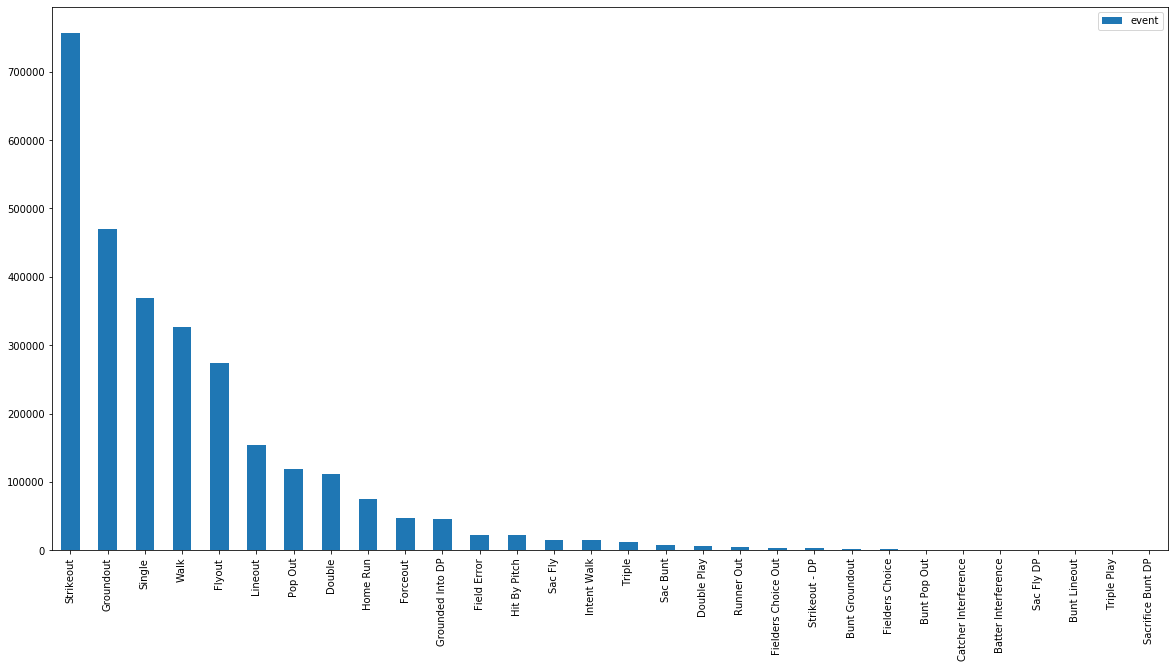

In [46]:
plt_bar(event_df, 'event')

In [83]:
# event analyize, input target and attribute, return dict and df
def event_analyize(dataframe, target, attribute):
    event_df = dataframe[dataframe['event']==target][attribute]
    event_set = set(event_df)
    event_nor_df = event_df.value_counts() / dataframe[attribute].value_counts()
    event_nor_df = event_nor_df / event_nor_df.sum() # calculate the ratio of event happend 
    
    return event_df.value_counts(), event_nor_df
    
    

In [6]:
def get_event_dict(df):
    event_set = set(df)
    event_dict = dict(zip(event_set, [0]*len(event_set)))
    for event in df:
        event_dict[event] += 1
    return event_dict

In [84]:
# visualization 
def plt_bar(dataframe, attribute):
    dataframe.plot.bar(y=attribute, figsize=(20,10))

In [93]:
def plt_pie(dataframe,attribute):
    dataframe.plot.pie(y=attribute, figsize=(20,10), autopct="%1.1f%%")

In [43]:
hit_df, hit_nor_df = event_analyize(final_df, "Single", 'pitch_type')

In [37]:
hit_nor_df

Changeup              0.065436
Curveball             0.063259
Cutter                0.066827
Eephus                0.067135
Fastball              0.113635
Four Seam Fastball    0.064329
Intentional Ball           NaN
Knuckle Curve         0.063085
Knuckleball           0.064760
Pitch Out             0.066498
Screwball             0.067879
Sinker                0.074037
Slider                0.062718
Splitter              0.060127
Two seam fastball     0.073364
Unidentified          0.026913
Name: pitch_type, dtype: float64

In [38]:
hit_df

Four Seam Fastball    127672
Slider                 55264
Two seam fastball      48490
Changeup               37467
Sinker                 35111
Curveball              28996
Cutter                 19571
Knuckle Curve           8202
Splitter                5139
Knuckleball             1426
Pitch Out                187
Eephus                   107
Screwball                 15
Unidentified               3
Fastball                   2
Name: pitch_type, dtype: int64

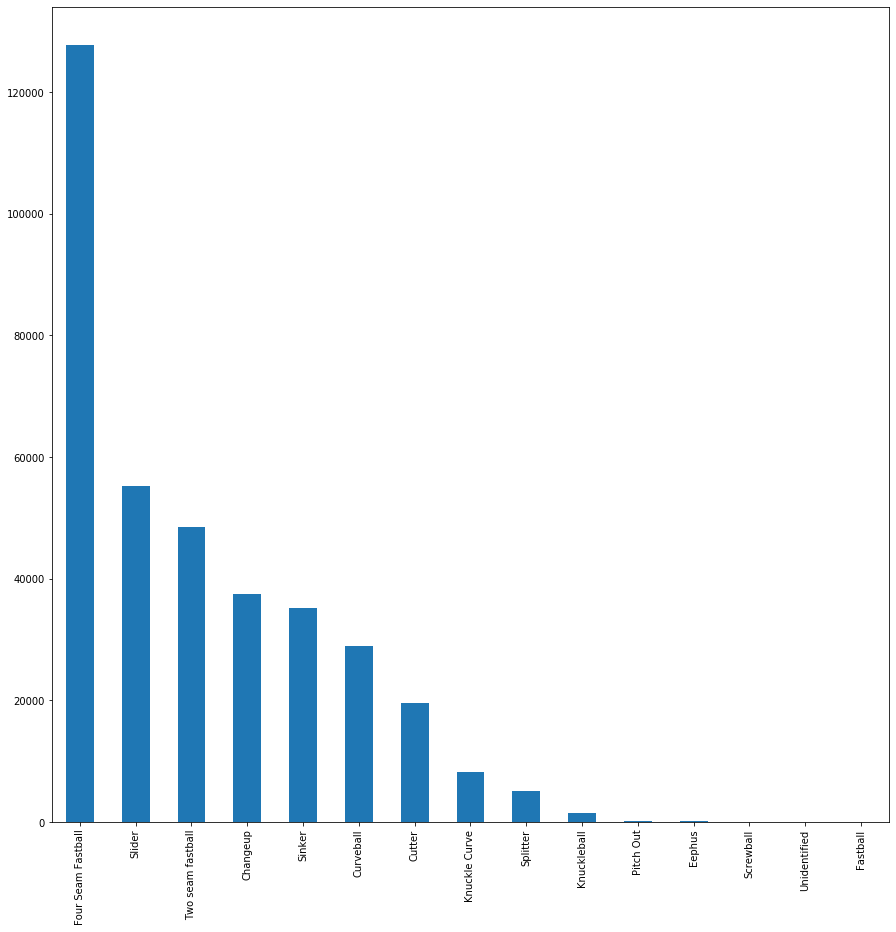

In [44]:
plt_bar(hit_df,"Single")

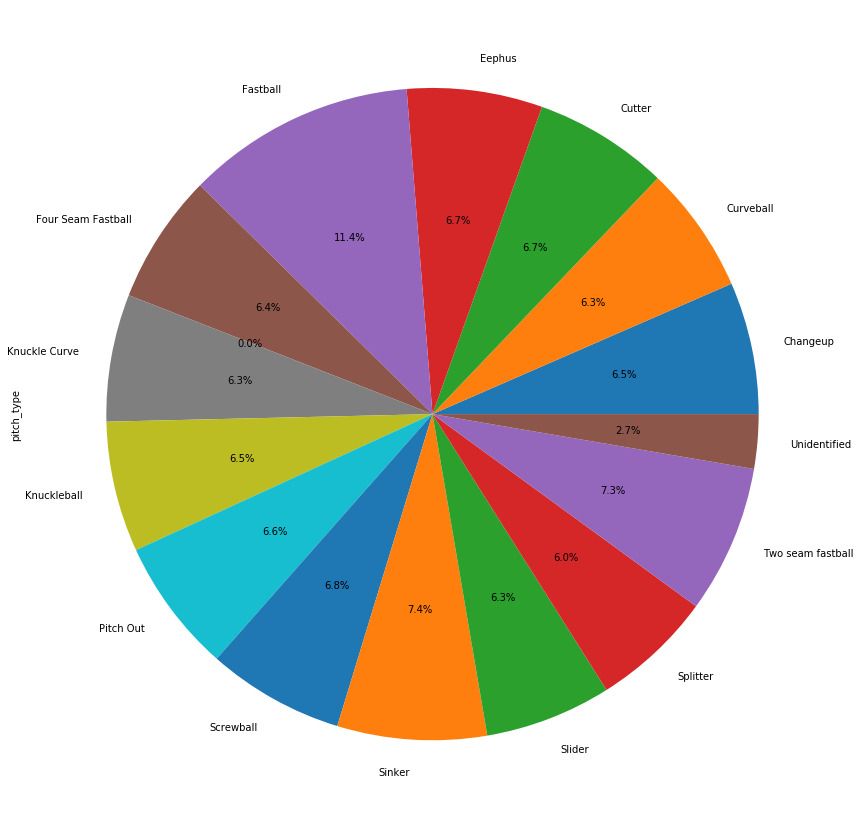

In [47]:
plt_pie(hit_nor_df, "Single")

In [49]:
set(final_df['event'])

{'Batter Interference',
 'Bunt Groundout',
 'Bunt Lineout',
 'Bunt Pop Out',
 'Catcher Interference',
 'Double',
 'Double Play',
 'Field Error',
 'Fielders Choice',
 'Fielders Choice Out',
 'Flyout',
 'Forceout',
 'Grounded Into DP',
 'Groundout',
 'Hit By Pitch',
 'Home Run',
 'Intent Walk',
 'Lineout',
 'Pop Out',
 'Runner Out',
 'Sac Bunt',
 'Sac Fly',
 'Sac Fly DP',
 'Sacrifice Bunt DP',
 'Single',
 'Strikeout',
 'Strikeout - DP',
 'Triple',
 'Triple Play',
 'Walk'}

In [50]:
event_analyize(final_df, "Strikeout", "pitch_type")

(Four Seam Fastball    267859
 Slider                139793
 Changeup               73144
 Two seam fastball      73016
 Curveball              70582
 Sinker                 53634
 Cutter                 39271
 Knuckle Curve          21605
 Splitter               13169
 Knuckleball             2450
 Pitch Out                393
 Eephus                   227
 Screwball                 25
 Unidentified               8
 Fastball                   3
 Name: pitch_type, dtype: int64, Changeup              0.063808
 Curveball             0.076913
 Cutter                0.066979
 Eephus                0.071140
 Fastball              0.085139
 Four Seam Fastball    0.067413
 Intentional Ball           NaN
 Knuckle Curve         0.083001
 Knuckleball           0.055575
 Pitch Out             0.069804
 Screwball             0.056508
 Sinker                0.056490
 Slider                0.079244
 Splitter              0.076961
 Two seam fastball     0.055179
 Unidentified          0.035848
 Name:

In [9]:
event_analyize(final_df, 'Bunt Groundout', 'pitch_type')

(Four Seam Fastball    791
 Two seam fastball     324
 Slider                252
 Changeup              252
 Sinker                196
 Cutter                143
 Curveball             142
 Knuckle Curve          38
 Splitter               32
 Knuckleball             3
 Pitch Out               1
 Unidentified            1
 Eephus                  1
 Name: pitch_type, dtype: int64, Changeup              0.032401
 Curveball             0.022807
 Cutter                0.035947
 Eephus                0.046191
 Fastball                   NaN
 Four Seam Fastball    0.029341
 Intentional Ball           NaN
 Knuckle Curve         0.021517
 Knuckleball           0.010030
 Pitch Out             0.026179
 Screwball                  NaN
 Sinker                0.030427
 Slider                0.021055
 Splitter              0.027564
 Two seam fastball     0.036088
 Unidentified          0.660453
 Name: pitch_type, dtype: float64)

In [54]:
final_df.columns

Index(['Batters Name', 'Pitcher_name', 'ab_id', 'attendance',
       'away_final_score', 'away_team', 'ax', 'ay', 'az', 'b_count', 'b_score',
       'batter_id', 'break_angle', 'break_length', 'break_y', 'code', 'date',
       'delay', 'elapsed_time', 'end_speed', 'event', 'event_num', 'g_id',
       'home_final_score', 'home_team', 'inning', 'nasty', 'o', 'on_1b',
       'on_2b', 'on_3b', 'outs', 'p_score', 'p_throws', 'pfx_x', 'pfx_z',
       'pitch_num', 'pitch_type', 'pitcher_id', 'px', 'pz', 's_count',
       'spin_dir', 'spin_rate', 'stand', 'start_speed', 'start_time', 'sz_bot',
       'sz_top', 'top', 'type', 'type_confidence', 'umpire_1B', 'umpire_2B',
       'umpire_3B', 'umpire_HP', 'venue_name', 'vx0', 'vy0', 'vz0', 'weather',
       'wind', 'x', 'x0', 'y', 'y0', 'z0', 'zone'],
      dtype='object')

In [11]:
event_analyize(final_df, 'Bunt Groundout', 'start_speed')

(91.2    29
 91.0    29
 92.5    27
 93.0    27
 93.1    27
 91.5    26
 90.9    26
 91.6    26
 90.7    25
 88.6    25
 93.5    24
 93.4    24
 91.3    24
 91.7    23
 92.0    23
 90.1    22
 91.1    21
 90.0    21
 89.1    21
 89.4    21
 89.2    20
 92.9    20
 92.3    20
 90.2    20
 90.3    20
 92.2    19
 90.6    19
 91.9    19
 92.1    19
 90.5    19
         ..
 68.3     1
 75.8     1
 70.7     1
 70.8     1
 72.4     1
 72.7     1
 75.4     1
 75.9     1
 75.6     1
 67.8     1
 76.8     1
 74.9     1
 97.9     1
 71.9     1
 69.9     1
 71.5     1
 76.9     1
 78.5     1
 73.0     1
 75.5     1
 73.1     1
 74.8     1
 80.3     1
 70.6     1
 77.6     1
 70.3     1
 79.3     1
 97.4     1
 70.1     1
 71.3     1
 Name: start_speed, Length: 264, dtype: int64, 33.9     0.793791
 37.5          NaN
 40.0          NaN
 40.3          NaN
 40.6          NaN
 40.8          NaN
 40.9          NaN
 41.0          NaN
 41.1          NaN
 41.2          NaN
 41.3          NaN
 41.4        

In [15]:
final_df[['start_speed','end_speed','pitch_type','event']]

,start_speed,end_speed,pitch_type,event
0,92.9,84.1,Four Seam Fastball,Groundout
1,92.8,84.1,Four Seam Fastball,Groundout
2,94.1,85.2,Four Seam Fastball,Groundout
3,91.0,84.0,Four Seam Fastball,Groundout
4,75.4,69.6,Curveball,Groundout
5,92.9,84.8,Four Seam Fastball,Groundout
6,93.3,85.3,Four Seam Fastball,Double
7,89.3,82.4,Cutter,Double
8,92.1,85.0,Four Seam Fastball,Single
9,89.3,82.0,Four Seam Fastball,Single


In [37]:
!pip install seaborn

In [38]:
import seaborn

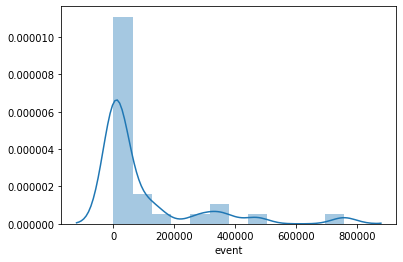

In [41]:
seaborn.distplot(event_df['event'])

In [42]:
event_df

,event
Strikeout,757160
Groundout,469560
Single,368621
Walk,327001
Flyout,273909
Lineout,154000
Pop Out,118552
Double,112074
Home Run,75075
Forceout,47442


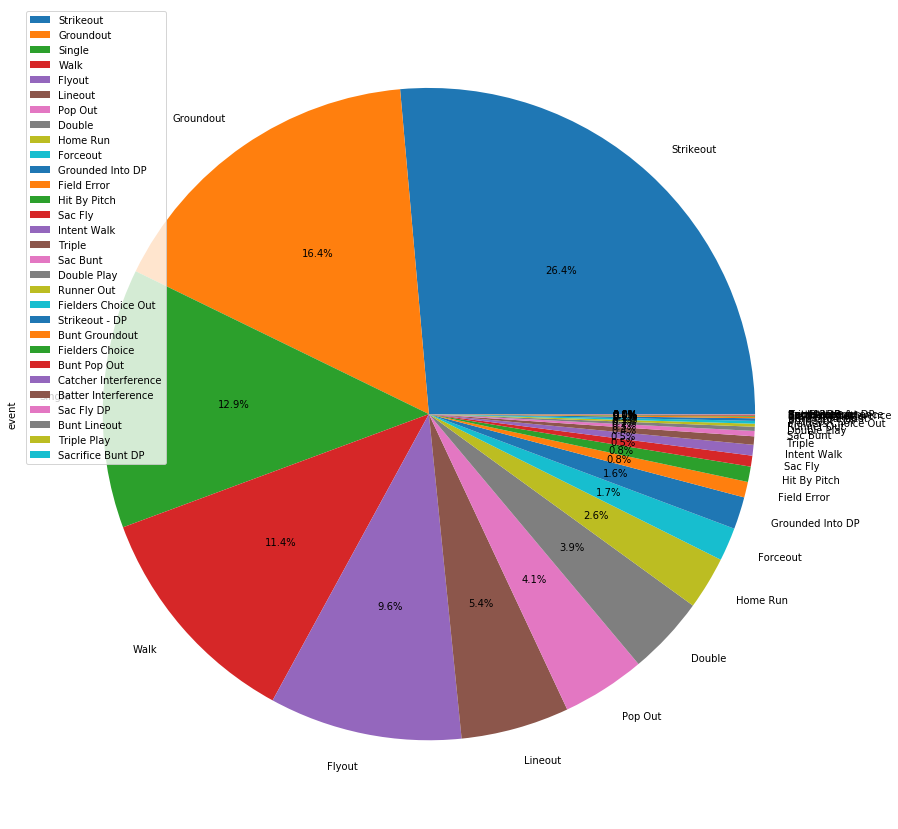

In [49]:
plt_pie(event_df,'event')

In [50]:
! pip install plotly

  Stored in directory: C:\Users\cheean yu\AppData\Local\pip\Cache\wheels\d7\a9\33\acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying


In [52]:
import plotly.express as px

In [69]:
fig = px.pie(event_df, values=event_df.values, names=event_df.index ,title='event distribution',width=800, height=1000)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [62]:
event_df.values[event_df.values>1000]

array([757160, 469560, 368621, 327001, 273909, 154000, 118552, 112074,
        75075,  47442,  45873,  22237,  21764,  15508,  15346,  11872,
         7526,   5905,   4234,   3992,   3654,   2184,   1243],
      dtype=int64)

In [72]:
pitch_type_df = final_df['pitch_type'].value_counts().to_frame()

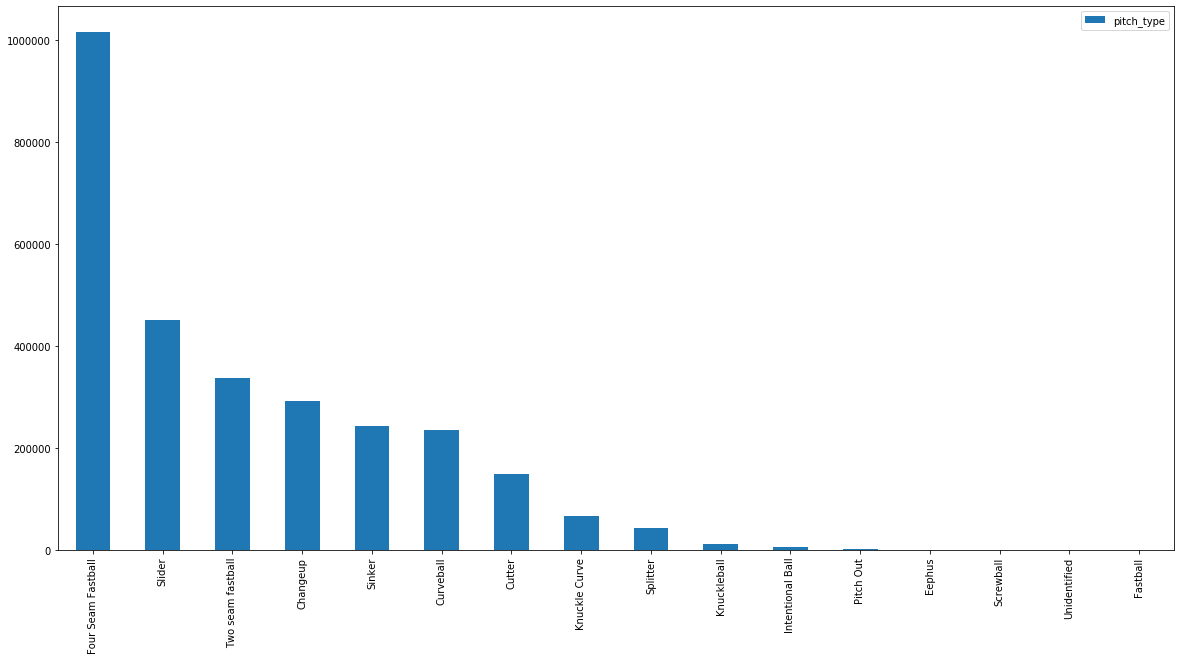

In [73]:
plt_bar(pitch_type_df,'pitch_type')

In [74]:
fig_pitch_type = px.pie(pitch_type_df, values=pitch_type_df.values, names=pitch_type_df.index ,title='pitch_type distribution',width=800, height=1000)
fig_pitch_type.update_traces(textposition='inside', textinfo='percent+label')
fig_pitch_type.show()

In [77]:
hr_event = final_df[final_df['event']=='Home Run']['pitch_type']

In [80]:
hr_df = hr_event.value_counts().to_frame()

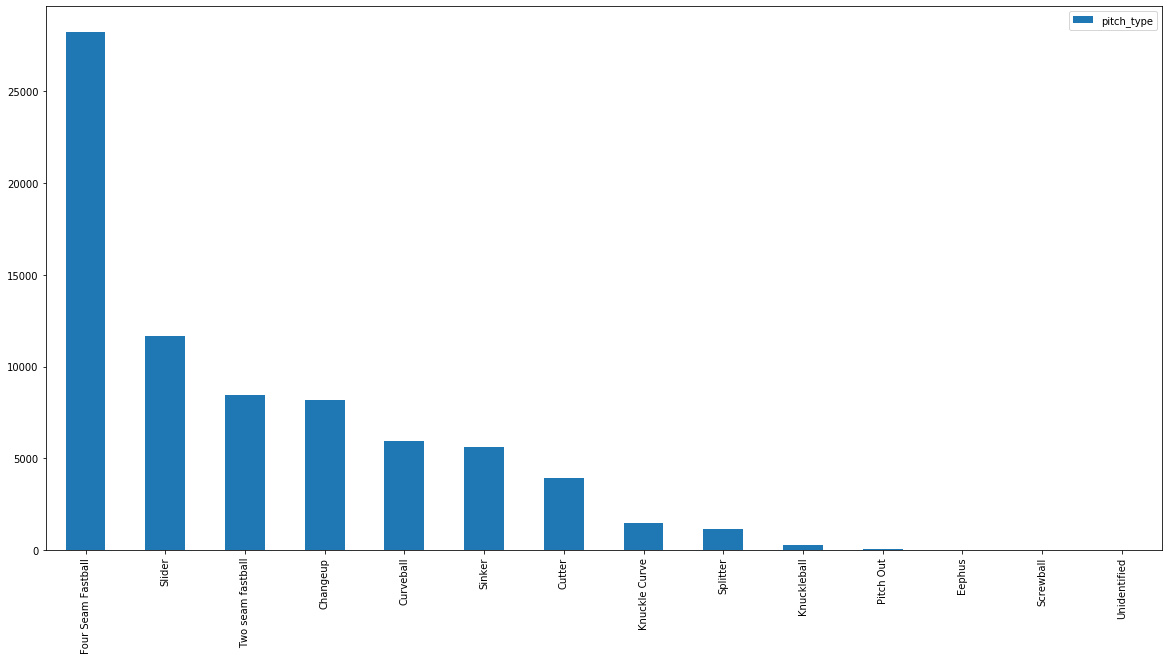

In [81]:
plt_bar(hr_df, 'pitch_type')

In [82]:
fig_hr_event = px.pie(hr_df, values=hr_df.values, names=hr_df.index ,title='Home_run pitch_type distribution',width=800, height=1000)
fig_pitch_type.update_traces(textposition='inside', textinfo='percent+label')
fig_pitch_type.show()

In [87]:
hr_count, hr_dist = event_analyize(final_df,"Home Run", "pitch_type")

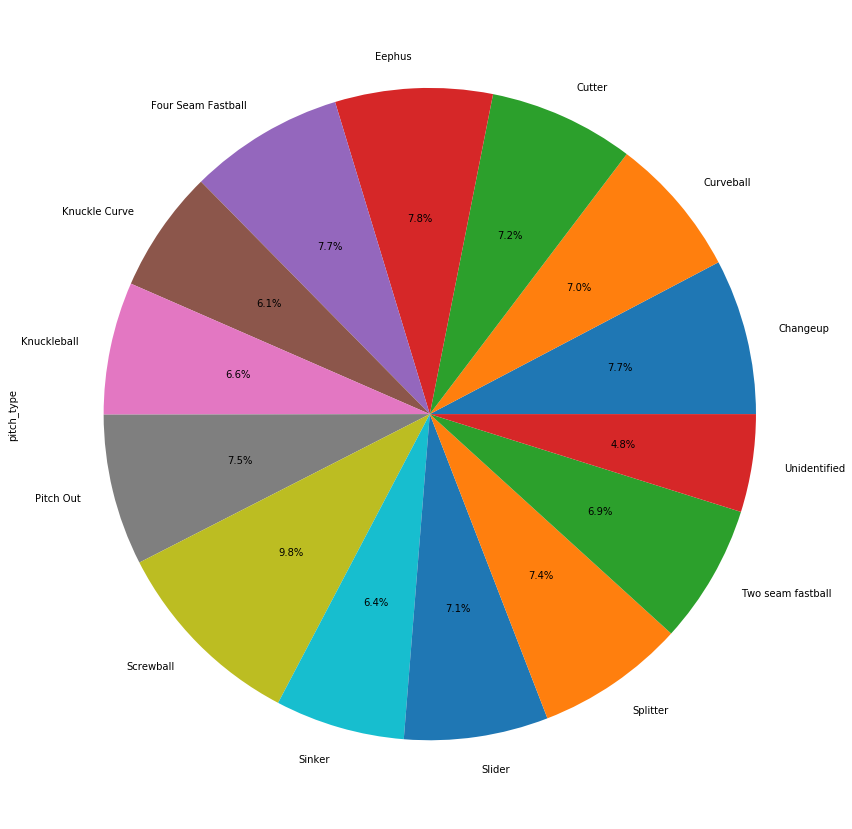

In [90]:
plt_pie(hr_dist[hr_dist>0],'pitch_type')

In [91]:
single_count, single_dist = event_analyize(final_df,"Single", "pitch_type")

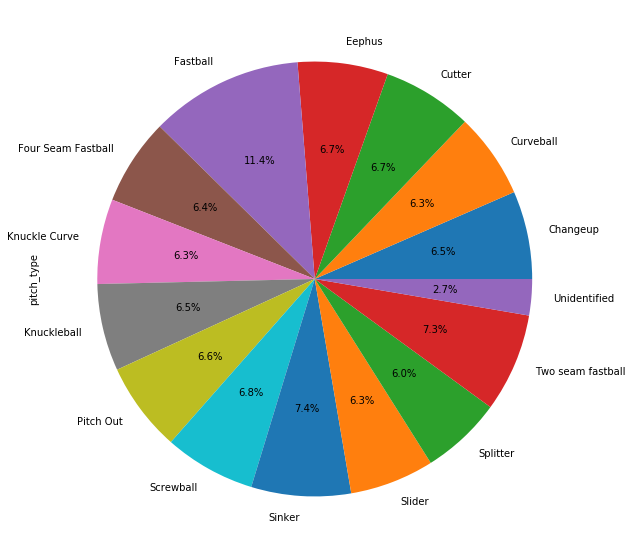

In [94]:
plt_pie(single_dist[single_dist>0],'pitch_type')

In [100]:
set(final_df['event'])

{'Batter Interference',
 'Bunt Groundout',
 'Bunt Lineout',
 'Bunt Pop Out',
 'Catcher Interference',
 'Double',
 'Double Play',
 'Field Error',
 'Fielders Choice',
 'Fielders Choice Out',
 'Flyout',
 'Forceout',
 'Grounded Into DP',
 'Groundout',
 'Hit By Pitch',
 'Home Run',
 'Intent Walk',
 'Lineout',
 'Pop Out',
 'Runner Out',
 'Sac Bunt',
 'Sac Fly',
 'Sac Fly DP',
 'Sacrifice Bunt DP',
 'Single',
 'Strikeout',
 'Strikeout - DP',
 'Triple',
 'Triple Play',
 'Walk'}

In [116]:
strike_count, strike_dist = event_analyize(final_df,"Strikeout", "pitch_type")

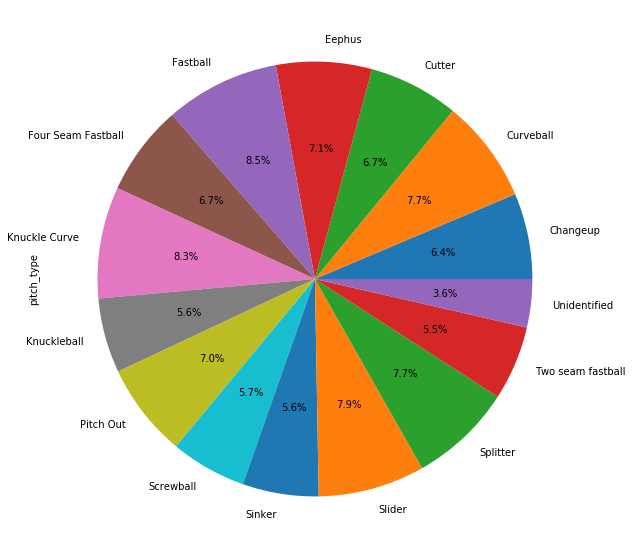

In [118]:
plt_pie(strike_dist[strike_dist>0],'pitch_type')

In [120]:
final_df.columns

Index(['Batters Name', 'Pitcher_name', 'ab_id', 'attendance',
       'away_final_score', 'away_team', 'ax', 'ay', 'az', 'b_count', 'b_score',
       'batter_id', 'break_angle', 'break_length', 'break_y', 'code', 'date',
       'delay', 'elapsed_time', 'end_speed', 'event', 'event_num', 'g_id',
       'home_final_score', 'home_team', 'inning', 'nasty', 'o', 'on_1b',
       'on_2b', 'on_3b', 'outs', 'p_score', 'p_throws', 'pfx_x', 'pfx_z',
       'pitch_num', 'pitch_type', 'pitcher_id', 'px', 'pz', 's_count',
       'spin_dir', 'spin_rate', 'stand', 'start_speed', 'start_time', 'sz_bot',
       'sz_top', 'top', 'type', 'type_confidence', 'umpire_1B', 'umpire_2B',
       'umpire_3B', 'umpire_HP', 'venue_name', 'vx0', 'vy0', 'vz0', 'weather',
       'wind', 'x', 'x0', 'y', 'y0', 'z0', 'zone'],
      dtype='object')

In [139]:
hit_event_df = final_df[(final_df['code']=='In play runs')& (final_df['event']=='Home Run')]

In [144]:
hr_pos = hit_event_df[['px','pz']]

In [138]:
set(final_df['event'])

{'Batter Interference',
 'Bunt Groundout',
 'Bunt Lineout',
 'Bunt Pop Out',
 'Catcher Interference',
 'Double',
 'Double Play',
 'Field Error',
 'Fielders Choice',
 'Fielders Choice Out',
 'Flyout',
 'Forceout',
 'Grounded Into DP',
 'Groundout',
 'Hit By Pitch',
 'Home Run',
 'Intent Walk',
 'Lineout',
 'Pop Out',
 'Runner Out',
 'Sac Bunt',
 'Sac Fly',
 'Sac Fly DP',
 'Sacrifice Bunt DP',
 'Single',
 'Strikeout',
 'Strikeout - DP',
 'Triple',
 'Triple Play',
 'Walk'}

In [ ]:
seanborn.heatmap()

In [132]:
hit_event_df

,Batters Name,Pitcher_name,ab_id,attendance,away_final_score,away_team,ax,ay,az,b_count,...,vy0,vz0,weather,wind,x,x0,y,y0,z0,zone
7,Jason Heyward,Jon Lester,2015000002,35055,3,sln,-1.339000,27.421000,-19.326000,1.0,...,-130.711000,-4.611000,"44 degrees, clear","7 mph, In from CF",186.41,2.298000,182.54,50.0,5.284000,7.0
20,Dexter Fowler,Adam Wainwright,2015000006,35055,3,sln,2.592000,26.888000,-20.916000,1.0,...,-128.166000,-4.912000,"44 degrees, clear","7 mph, In from CF",116.70,-1.264000,168.53,50.0,6.180000,5.0
47,Jon Jay,Jon Lester,2015000012,35055,3,sln,1.235000,23.762000,-22.788000,0.0,...,-127.079000,-2.680000,"44 degrees, clear","7 mph, In from CF",133.47,2.216000,172.79,50.0,5.305000,4.0
58,Chris Coghlan,Adam Wainwright,2015000016,35055,3,sln,4.629000,25.508000,-19.943000,2.0,...,-127.671000,-6.276000,"44 degrees, clear","7 mph, In from CF",125.39,-1.179000,182.67,50.0,6.130000,5.0
71,Jason Heyward,Jon Lester,2015000020,35055,3,sln,15.342000,30.581000,-13.362000,0.0,...,-133.273000,-5.018000,"44 degrees, clear","7 mph, In from CF",113.65,2.140000,172.14,50.0,5.351000,5.0
92,Tommy La Stella,Adam Wainwright,2015000024,35055,3,sln,1.929000,23.119000,-22.023000,3.0,...,-126.698000,-4.410000,"44 degrees, clear","7 mph, In from CF",106.67,-1.138000,164.64,50.0,6.244000,6.0
144,Matt Carpenter,Jon Lester,2015000035,35055,3,sln,-2.871000,25.210000,-23.255000,3.0,...,-124.153000,-2.467000,"44 degrees, clear","7 mph, In from CF",105.49,2.396000,172.74,50.0,5.391000,6.0
150,Jason Heyward,Jon Lester,2015000036,35055,3,sln,13.997000,27.793000,-16.988000,3.0,...,-130.908000,-4.845000,"44 degrees, clear","7 mph, In from CF",151.76,2.038000,182.70,50.0,5.225000,13.0
170,David Ross,Adam Wainwright,2015000042,35055,3,sln,1.458000,25.719000,-24.348000,2.0,...,-124.814000,-3.738000,"44 degrees, clear","7 mph, In from CF",101.75,-1.165000,165.56,50.0,6.240000,6.0
211,Starlin Castro,Adam Wainwright,2015000051,35055,3,sln,-3.515000,30.276000,-18.578000,1.0,...,-131.180000,-6.385000,"44 degrees, clear","7 mph, In from CF",106.29,-0.906000,179.38,50.0,6.071000,6.0
